In [40]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
import timeit

In [46]:
def plot_time_bargraph(pd_times, pl_times, title, dataframe = False):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    if dataframe:
        times = [pd_times, pl_times]
    else:
        pd_averages = np.round([pd_time.average for pd_time in pd_times], 3)
    times = np.round(times, 3)

    sns.barplot(x = ['Pandas', 'Polars'], 
                y = times, palette = "Blues_d",
                width = 0.5
                #color = 'darkseagreen',
                #saturation = 0.75
                )

    ax.set_title(f"Comparison of {title}")
    ax.set_xlabel("Pandas versus Polars")
    ax.set_ylabel("Time (s)")
    
    ax.bar_label(ax.containers[0])
    #plt.savefig(f'./pandas_vs_polars_{title}.png', transparent=False,  facecolor='white', bbox_inches="tight")
    plt.show() 

Read csv

In [44]:
print("================== Pandas ==================")
start_pd = time.time()
# 1280*18--> 0.01846790313720703
pd_df = pd.read_csv("202206_YouBike2.0票證刷卡資料.csv")
pd_duration = time.time() - start_pd
print('pandas time:',pd_duration)
print()
print("================== Polars ==================")
start_pl = time.time()
# 1280*18--> 0.052963972091674805
pl_df = pl.read_csv("202206_YouBike2.0票證刷卡資料.csv")
pl_duration = time.time() - start_pl
print('polars time:',pl_duration)

================== Pandas ==================
pandas time: 2.1965112686157227

================== Polars ==================
polars time: 0.31434130668640137


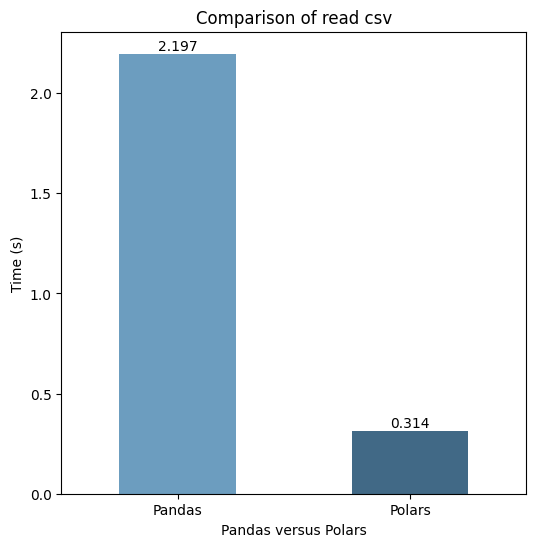

In [47]:
plot_time_bargraph(pd_duration, pl_duration, 'read csv', True)

Value counts

In [48]:
print("================== Pandas ==================")
pd_values_count = %timeit -n 1 -r 1 -o pd_df.value_counts("rent_station")
print()
print("================== Polars ==================")
pl_values_count = %timeit -n 1 -r 1 -o pl_df.select(pl.col("rent_station").value_counts(sort=True))


================== Pandas ==================
179 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

================== Polars ==================
116 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


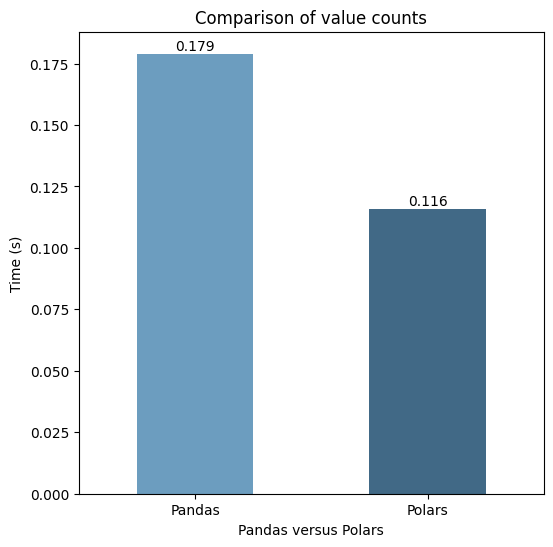

In [66]:
plot_time_bargraph(pd_values_count, pl_values_count, 'value counts')

Groupby and aggregation

In [56]:

print("================== Pandas ==================")
pd_group_operate_1 = %timeit -n 1 -r 1 -o pd_df.groupby(['rent_station'])['return_station'].aggregate('count')
pd_group_operate_2 = %timeit -n 1 -r 1 -o pd_df.groupby(['rent_station'])['rent'].aggregate('min')
pd_group_operate_3 = %timeit -n 1 -r 1 -o pd_df.groupby(['rent_station'])['rent'].aggregate('max')
print()
print("================== Polars ==================")
pl_group_operate_1 = %timeit -n 1 -r 1 -o pl_df.groupby('rent_station').agg([pl.col('return_station').count()])
pl_group_operate_2 = %timeit -n 1 -r 1 -o pl_df.groupby('rent_station').agg([pl.col('rent').min()])
pl_group_operate_3 = %timeit -n 1 -r 1 -o pl_df.groupby('rent_station').agg([pl.col('rent').max()])

================== Pandas ==================
266 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
600 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
573 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

================== Polars ==================
39.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
62.3 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
103 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


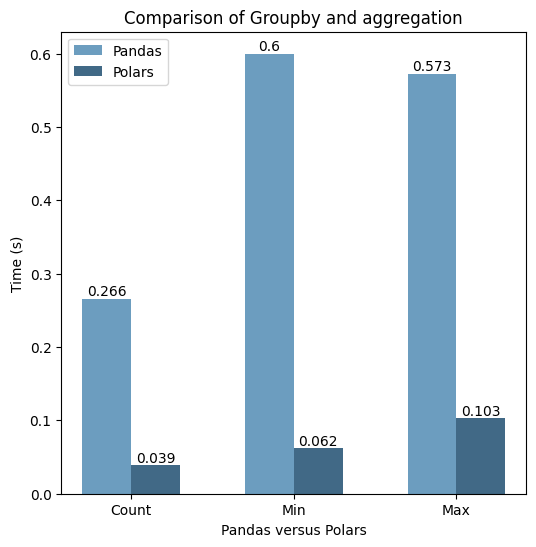

In [65]:
def plot_comparison(pd_times, pl_times, titles):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

    pd_averages = np.round([pd_time.average for pd_time in pd_times], 3)
    pl_averages = np.round([pl_time.average for pl_time in pl_times], 3)

    x = np.arange(len(titles))  
    width = 0.3

    pd_bars = ax.bar(x - width/2, pd_averages, width, label='Pandas', color='#6c9dbf')
    pl_bars = ax.bar(x + width/2, pl_averages, width, label='Polars', color='#416986')

    ax.set_title("Comparison of Groupby and aggregation")
    ax.set_ylabel("Time (s)")
    ax.set_xlabel("Pandas versus Polars")
    ax.set_xticks(x)
    ax.set_xticklabels(titles)
    ax.bar_label(pd_bars, label_type='edge')  
    ax.bar_label(pl_bars, label_type='edge') 
    ax.legend()
    plt.show()

pd_times = [pd_group_operate_1, pd_group_operate_2, pd_group_operate_3]
pl_times = [pl_group_operate_1, pl_group_operate_2, pl_group_operate_3]
titles = ['Count', 'Min', 'Max']
plot_comparison(pd_times, pl_times, titles)
